<a href="https://colab.research.google.com/github/mehrotrasan16/Keras-Deep-Learning/blob/02-Q2-HparamsSemiFinal/A2_Q2_FashionMNISTHandwritten_Hparams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import models,layers

train_data, test_data,  = tf.keras.datasets.fashion_mnist.load_data()


# Data Preprocessing

In [3]:
train_images, train_labels = train_data
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [4]:
test_images, test_labels = test_data
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

In [5]:
# Normalize pixel values to be between 0 and 1
train_images,test_images  = train_images / 255.0, test_images / 255.0

In [6]:
train_images.shape[1:], test_images.shape[1:]

((28, 28), (28, 28))

In [7]:
classes =(np.unique(train_labels))
classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
classnames = np.array(['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt', 'sneaker', 'bag','ankle-boot'])
classnames

array(['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
       'Shirt', 'sneaker', 'bag', 'ankle-boot'], dtype='<U10')

In [9]:
classes = classes.reshape((-1,1))
classnames = classnames.reshape((-1,1))

In [10]:
arrayclass = np.hstack((classes,classnames))

In [11]:
ClassDistribution = pd.DataFrame(arrayclass,columns=['Class','Class-name'])
ClassDistribution

,Class,Class-name
0,0,T-shirt
1,1,Trouser
2,2,Pullover
3,3,Dress
4,4,Coat
5,5,Sandal
6,6,Shirt
7,7,sneaker
8,8,bag
9,9,ankle-boot


In [12]:
freqs = [list(train_labels).count(x) for x in classes]

In [13]:
ClassDistribution['Train Freq'] = freqs

In [14]:
ClassDistribution

,Class,Class-name,Train Freq
0,0,T-shirt,6000
1,1,Trouser,6000
2,2,Pullover,6000
3,3,Dress,6000
4,4,Coat,6000
5,5,Sandal,6000
6,6,Shirt,6000
7,7,sneaker,6000
8,8,bag,6000
9,9,ankle-boot,6000


In [15]:
test_freqs = [list(test_labels).count(x) for x in classes]

In [16]:
ClassDistribution['Test Freq'] = freqs

In [17]:
ClassDistribution

,Class,Class-name,Train Freq,Test Freq
0,0,T-shirt,6000,6000
1,1,Trouser,6000,6000
2,2,Pullover,6000,6000
3,3,Dress,6000,6000
4,4,Coat,6000,6000
5,5,Sandal,6000,6000
6,6,Shirt,6000,6000
7,7,sneaker,6000,6000
8,8,bag,6000,6000
9,9,ankle-boot,6000,6000


In [18]:
train_images[0].shape

(28, 28)

# HandWritten Model

In [19]:
#INSERT YOUR MODEL CODE HERE
#YOU CAN ALSO CHANGE THE CODE BELOW TO COMPILE AND RUN THE MODEL

model = models.Sequential()
model.add(keras.layers.Reshape(input_shape=(28*28,), target_shape=(28, 28, 1))),
model.add(layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
#model.add(layers.BatchNormalization(center=True, scale=False))
model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
#model.add(layers.BatchNormalization(center=True, scale=False))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
#model.add(layers.BatchNormalization(center=True, scale=False))
model.add(layers.Dropout(0.50))
model.add(layers.Dense(10))


In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=15, 
                    validation_data=(test_images, test_labels))

Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4182 - accuracy: 0.8483 - val_loss: 0.3136 - val_accuracy: 0.8868
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2759 - accuracy: 0.8996 - val_loss: 0.2714 - val_accuracy: 0.9008
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2294 - accuracy: 0.9155 - val_loss: 0.2419 - val_accuracy: 0.9090
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2019 - accuracy: 0.9242 - val_loss: 0.2271 - val_accuracy: 0.9146
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1775 - accuracy: 0.9345 - val_loss: 0.2279 - val_accuracy: 0.9154
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1575 - accuracy: 0.9419 - val_loss: 0.2473 - val_accuracy: 0.9148
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1405 - accuracy: 0.9473 - val_loss: 0.2353 - val_accuracy:

313/313 - 1s - loss: 0.3418 - accuracy: 0.9194


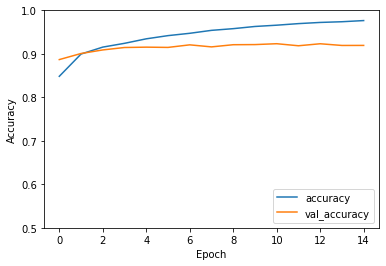

In [21]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

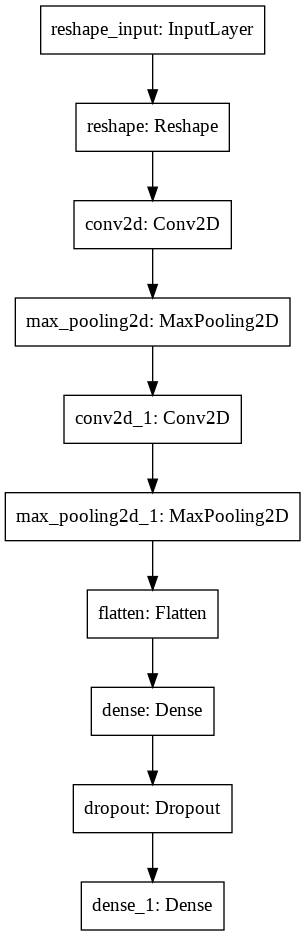

In [22]:
keras.utils.plot_model(model)

# Loading AutoKeras Model

In [23]:
from keras.models import load_model
# returns a compiled model
# identical to the previous one
model = load_model('/content/drive/My Drive/Colab Notebooks/AutoKerasFashionMNIST.h5')
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
normalization (Normalization)   (None, 28, 28, 1)    3           input_1[0][0]                    
__________________________________________________________________________________________________
random_translation (RandomTrans (None, 28, 28, 1)    0           normalization[0][0]              
__________________________________________________________________________________________________
random_flip (RandomFlip)        (None, 28, 28, 1)    0           random_translation[0][0]         
_______________________________________________________________________________________

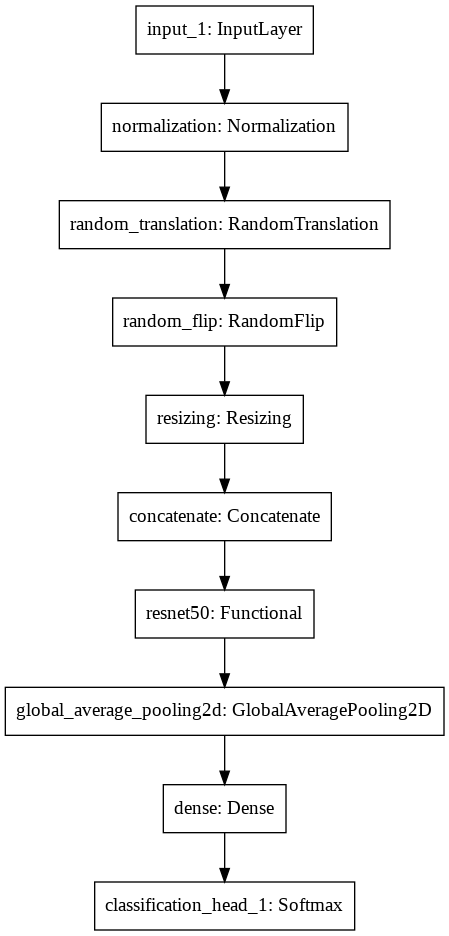

In [24]:
keras.utils.plot_model(model)

# HParams Tuning

In [25]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [26]:
from tensorboard.plugins.hparams import api as hp

In [27]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

In [28]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Optimizer Tuning

In [29]:
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['rmsprop','sgd','adam', 'nadam','adadelta','adagrad','adamax','ftrl']))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
  hp.hparams_config(
    hparams=[HP_OPTIMIZER],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

In [30]:
def train_test_model(hparams):
  #model = load_model('/content/drive/My Drive/Colab Notebooks/CS581-TestResults/AutoKerasFashionMNIST.h5')
    model = models.Sequential()
    model.add(keras.layers.Reshape(input_shape=(28*28,), target_shape=(28, 28, 1))),
    model.add(layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28)))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.50))
    model.add(layers.Dense(10))

    model.compile(
        optimizer=hparams[HP_OPTIMIZER],
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'],
    )
    model.fit(x_train, y_train, epochs=15) # Run with 1 epoch to speed things up for demo purposes
    _, accuracy = model.evaluate(x_test, y_test)
    return accuracy

In [31]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)
  return accuracy

In [32]:
session_num = 0
algodict = {}
for optimizer in HP_OPTIMIZER.domain.values:
    hparams = {
        HP_OPTIMIZER: optimizer,
    }
    run_name = "run-%d" % session_num
    print('--- Starting trial: %s' % run_name)
    print({h.name: hparams[h] for h in hparams})
    algodict[optimizer] = run('logs/hparam_opt_tuning/' + run_name, hparams)
    session_num += 1


--- Starting trial: run-0
{'optimizer': 'adadelta'}
Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2372 - accuracy: 0.2278
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.0372 - accuracy: 0.4514
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7274 - accuracy: 0.5297
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4027 - accuracy: 0.5590
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1966 - accuracy: 0.5806
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0788 - accuracy: 0.6039
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0080 - accuracy: 0.6223
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9587 - accuracy: 0.6417
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9170 - accuracy: 0.6617
Epoch 10/15
1875/1875 [=======

In [33]:
algodict

{'adadelta': 0.7563999891281128,
 'adagrad': 0.8482999801635742,
 'adam': 0.9241999983787537,
 'adamax': 0.925599992275238,
 'ftrl': 0.10000000149011612,
 'nadam': 0.923799991607666,
 'rmsprop': 0.8880000114440918,
 'sgd': 0.8974999785423279}

In [34]:
# algos = ['sgd','rmsprop','nadam','ftrl','adamax','adam','adagrad','adadelta']
# accuracy_results = [93.320,89.470,91.010,10.000,90.780,82.420,95.160,99.760]
# algodict = {algos[i]: accuracy_results[i] for i in range(len(accuracy_results))}
# algodict

In [35]:
print(sorted(algodict.items(),key=lambda x: (x[1],x[0])))
plotvar = sorted(algodict.items(),key=lambda x: (x[1],x[0]))

[('ftrl', 0.10000000149011612), ('adadelta', 0.7563999891281128), ('adagrad', 0.8482999801635742), ('rmsprop', 0.8880000114440918), ('sgd', 0.8974999785423279), ('nadam', 0.923799991607666), ('adam', 0.9241999983787537), ('adamax', 0.925599992275238)]


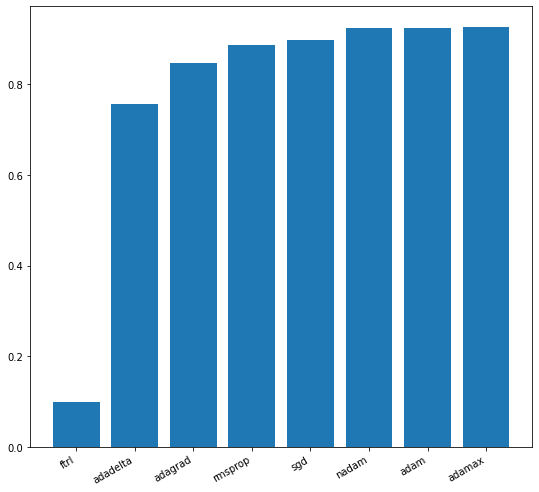

In [36]:
plt.bar([x[0] for x in plotvar],[x[1] for x in plotvar])
f = plt.gcf()
f.set_size_inches(9,9)
f.autofmt_xdate()

# Activation function Tuning

### 3 - layer Handwritten Network - 27 Combinations

In [51]:
# HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([16, 32]))
# HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.1, 0.2))
HP_ACTIVATIONS1 = hp.HParam('activation1',hp.Discrete(['relu','selu','elu']))
HP_ACTIVATIONS2 = hp.HParam('activation2',hp.Discrete(['relu','selu','elu']))
HP_ACTIVATIONS3 = hp.HParam('activation3',hp.Discrete(['relu','selu','elu']))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning_acts').as_default():
  hp.hparams_config(
    hparams=[HP_ACTIVATIONS1,HP_ACTIVATIONS2,HP_ACTIVATIONS3],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

In [52]:
def train_test_model(hparams):
  #model = load_model('/content/drive/My Drive/Colab Notebooks/CS581-TestResults/AutoKerasFashionMNIST.h5')
    model = models.Sequential()
    model.add(keras.layers.Reshape(input_shape=(28*28,), target_shape=(28, 28, 1))),
    model.add(layers.Conv2D(32, kernel_size=(3,3), padding='same', activation=hparams[HP_ACTIVATIONS1], input_shape=(28,28)))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same', activation=hparams[HP_ACTIVATIONS2]))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation=hparams[HP_ACTIVATIONS3]))
    model.add(layers.Dropout(0.50))
    model.add(layers.Dense(10))
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'],
    )
    model.fit(x_train, y_train, epochs=15) # Run with 1 epoch to speed things up for demo purposes
    _, accuracy = model.evaluate(x_test, y_test)
    return accuracy

In [53]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)
  return accuracy

In [54]:
session_num = 0
actdict = {}
for act1 in HP_ACTIVATIONS1.domain.values:
    for act2 in HP_ACTIVATIONS2.domain.values:
        for act3 in HP_ACTIVATIONS3.domain.values:
            hparams = {
                HP_ACTIVATIONS1: act1,
                HP_ACTIVATIONS2: act2,
                HP_ACTIVATIONS3: act3,
            }
            run_name = "run-%d" % session_num
            print('--- Starting trial: %s' % run_name)
            print({h.name: hparams[h] for h in hparams})
            actdict[(act1,act2,act3)] = run('logs/hparam_tuning_acts/' + run_name, hparams)
            session_num += 1


--- Starting trial: run-0
{'activation1': 'elu', 'activation2': 'elu', 'activation3': 'elu'}
Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 1.9414 - accuracy: 0.3555
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.0497 - accuracy: 0.5076
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2183 - accuracy: 0.3203
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2637 - accuracy: 0.2738
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2914 - accuracy: 0.2375
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3023 - accuracy: 0.2479
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3023 - accuracy: 0.2817
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3024 - accuracy: 0.2808
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3021 - accura

In [55]:
actdict

{('elu', 'elu', 'elu'): 0.41190001368522644,
 ('elu', 'elu', 'relu'): 0.10000000149011612,
 ('elu', 'elu', 'selu'): 0.10000000149011612,
 ('elu', 'relu', 'elu'): 0.10000000149011612,
 ('elu', 'relu', 'relu'): 0.09960000216960907,
 ('elu', 'relu', 'selu'): 0.19110000133514404,
 ('elu', 'selu', 'elu'): 0.2702000141143799,
 ('elu', 'selu', 'relu'): 0.10019999742507935,
 ('elu', 'selu', 'selu'): 0.10000000149011612,
 ('relu', 'elu', 'elu'): 0.10000000149011612,
 ('relu', 'elu', 'relu'): 0.10000000149011612,
 ('relu', 'elu', 'selu'): 0.10000000149011612,
 ('relu', 'relu', 'elu'): 0.225600004196167,
 ('relu', 'relu', 'relu'): 0.10029999911785126,
 ('relu', 'relu', 'selu'): 0.08699999749660492,
 ('relu', 'selu', 'elu'): 0.10000000149011612,
 ('relu', 'selu', 'relu'): 0.1923999935388565,
 ('relu', 'selu', 'selu'): 0.10000000149011612,
 ('selu', 'elu', 'elu'): 0.10000000149011612,
 ('selu', 'elu', 'relu'): 0.10000000149011612,
 ('selu', 'elu', 'selu'): 0.17020000517368317,
 ('selu', 'relu', 'el

In [56]:
print(sorted(actdict.items(),key=lambda x: (x[1],x[0])))

[(('relu', 'relu', 'selu'), 0.08699999749660492), (('elu', 'relu', 'relu'), 0.09960000216960907), (('elu', 'elu', 'relu'), 0.10000000149011612), (('elu', 'elu', 'selu'), 0.10000000149011612), (('elu', 'relu', 'elu'), 0.10000000149011612), (('elu', 'selu', 'selu'), 0.10000000149011612), (('relu', 'elu', 'elu'), 0.10000000149011612), (('relu', 'elu', 'relu'), 0.10000000149011612), (('relu', 'elu', 'selu'), 0.10000000149011612), (('relu', 'selu', 'elu'), 0.10000000149011612), (('relu', 'selu', 'selu'), 0.10000000149011612), (('selu', 'elu', 'elu'), 0.10000000149011612), (('selu', 'elu', 'relu'), 0.10000000149011612), (('selu', 'relu', 'elu'), 0.10000000149011612), (('selu', 'relu', 'relu'), 0.10000000149011612), (('selu', 'selu', 'relu'), 0.10000000149011612), (('elu', 'selu', 'relu'), 0.10019999742507935), (('relu', 'relu', 'relu'), 0.10029999911785126), (('selu', 'relu', 'selu'), 0.164000004529953), (('selu', 'selu', 'elu'), 0.1648000031709671), (('selu', 'selu', 'selu'), 0.164900004863

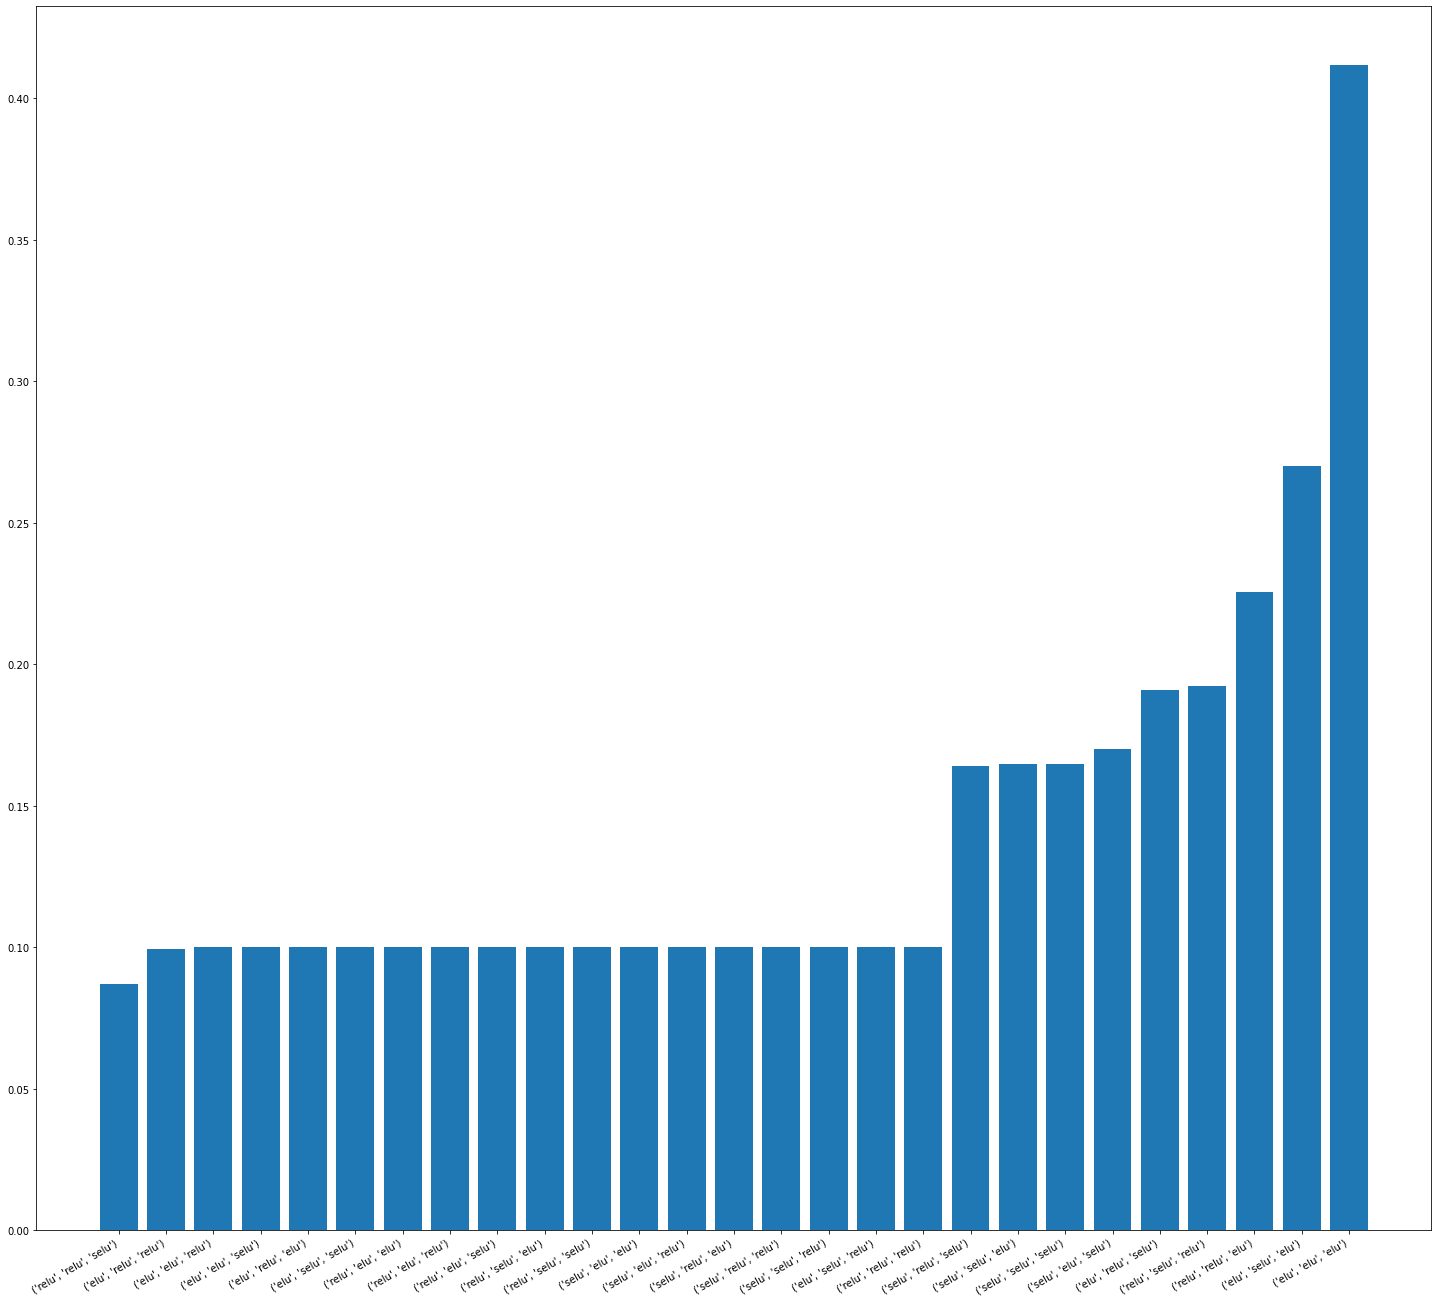

In [57]:
plotvar2 = sorted(actdict.items(),key=lambda x: (x[1],x[0]))
plt.bar([str(x[0]) for x in plotvar2],[x[1] for x in plotvar2])
f = plt.gcf()
f.set_size_inches(25,25)
f.autofmt_xdate()

### 4 - layer - Modified Network - 81 Combinations

In [58]:
# HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([16, 32]))
# HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.1, 0.2))
HP_ACTIVATIONS1 = hp.HParam('activation1',hp.Discrete(['relu','selu','elu']))
HP_ACTIVATIONS2 = hp.HParam('activation2',hp.Discrete(['relu','selu','elu']))
HP_ACTIVATIONS3 = hp.HParam('activation3',hp.Discrete(['relu','selu','elu']))
HP_ACTIVATIONS4 = hp.HParam('activation4',hp.Discrete(['relu','selu','elu']))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning_acts').as_default():
  hp.hparams_config(
    hparams=[HP_ACTIVATIONS1,HP_ACTIVATIONS2,HP_ACTIVATIONS3,HP_ACTIVATIONS4],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

In [59]:
def train_test_model(hparams):
  #model = load_model('/content/drive/My Drive/Colab Notebooks/CS581-TestResults/AutoKerasFashionMNIST.h5')
    model = models.Sequential()
    model.add(keras.layers.Reshape(input_shape=(28*28,), target_shape=(28, 28, 1))),
    model.add(layers.Conv2D(32, kernel_size=(3,3), padding='same', activation=hparams[HP_ACTIVATIONS1], input_shape=(28,28)))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    #model.add(layers.BatchNormalization(center=True, scale=False))
    model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same', activation=hparams[HP_ACTIVATIONS2]))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    #model.add(layers.BatchNormalization(center=True, scale=False))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation=hparams[HP_ACTIVATIONS3]))
    #model.add(layers.BatchNormalization(center=True, scale=False))
    model.add(layers.Dropout(0.50))
    model.add(layers.Dense(512, activation=hparams[HP_ACTIVATIONS4]))
    #model.add(layers.BatchNormalization(center=True, scale=False))
    model.add(layers.Dropout(0.50))
    model.add(layers.Dense(10))

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'],
    )
    model.fit(x_train, y_train, epochs=15) # Run with 1 epoch to speed things up for demo purposes
    _, accuracy = model.evaluate(x_test, y_test)
    return accuracy

In [60]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)
  return accuracy

In [61]:
session_num = 0
actdict_4layer = {}
for act1 in HP_ACTIVATIONS1.domain.values:
    for act2 in HP_ACTIVATIONS2.domain.values:
        for act3 in HP_ACTIVATIONS3.domain.values:
            for act4 in HP_ACTIVATIONS4.domain.values:            
                hparams = {
                    HP_ACTIVATIONS1: act1,
                    HP_ACTIVATIONS2: act2,
                    HP_ACTIVATIONS3: act3,
                    HP_ACTIVATIONS4: act4
                }
                run_name = "run-%d" % session_num
                print('--- Starting trial: %s' % run_name)
                print({h.name: hparams[h] for h in hparams})
                actdict_4layer[(act1,act2,act3,act4)] = run('logs/hparam_tuning_acts/' + run_name, hparams)
                session_num += 1


--- Starting trial: run-0
{'activation1': 'elu', 'activation2': 'elu', 'activation3': 'elu', 'activation4': 'elu'}
Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3448 - accuracy: 0.1344
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.1042
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3026 - accuracy: 0.1049
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3026 - accuracy: 0.1028
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3030 - accuracy: 0.1044
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3026 - accuracy: 0.1029
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 12.9098 - accuracy: 0.1004
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 9.9241 - accuracy: 0.1002
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step 

In [62]:
 print(f"Number of Sessions: {session_num}")

Number of Sessions: 81


In [63]:
actdict_4layer

{('elu', 'elu', 'elu', 'elu'): 0.10000000149011612,
 ('elu', 'elu', 'elu', 'relu'): 0.10000000149011612,
 ('elu', 'elu', 'elu', 'selu'): 0.10000000149011612,
 ('elu', 'elu', 'relu', 'elu'): 0.10000000149011612,
 ('elu', 'elu', 'relu', 'relu'): 0.10000000149011612,
 ('elu', 'elu', 'relu', 'selu'): 0.10000000149011612,
 ('elu', 'elu', 'selu', 'elu'): 0.10000000149011612,
 ('elu', 'elu', 'selu', 'relu'): 0.10000000149011612,
 ('elu', 'elu', 'selu', 'selu'): 0.10000000149011612,
 ('elu', 'relu', 'elu', 'elu'): 0.10000000149011612,
 ('elu', 'relu', 'elu', 'relu'): 0.10000000149011612,
 ('elu', 'relu', 'elu', 'selu'): 0.014000000432133675,
 ('elu', 'relu', 'relu', 'elu'): 0.09369999915361404,
 ('elu', 'relu', 'relu', 'relu'): 0.10000000149011612,
 ('elu', 'relu', 'relu', 'selu'): 0.10000000149011612,
 ('elu', 'relu', 'selu', 'elu'): 0.1444000005722046,
 ('elu', 'relu', 'selu', 'relu'): 0.10000000149011612,
 ('elu', 'relu', 'selu', 'selu'): 0.10000000149011612,
 ('elu', 'selu', 'elu', 'elu'):

In [64]:
print(sorted(actdict_4layer.items(),key=lambda x: (x[1],x[0])))

[(('elu', 'relu', 'elu', 'selu'), 0.014000000432133675), (('selu', 'selu', 'selu', 'relu'), 0.06620000302791595), (('selu', 'selu', 'relu', 'selu'), 0.093299999833107), (('elu', 'relu', 'relu', 'elu'), 0.09369999915361404), (('relu', 'elu', 'elu', 'selu'), 0.09380000084638596), (('selu', 'elu', 'elu', 'selu'), 0.09870000183582306), (('elu', 'elu', 'elu', 'elu'), 0.10000000149011612), (('elu', 'elu', 'elu', 'relu'), 0.10000000149011612), (('elu', 'elu', 'elu', 'selu'), 0.10000000149011612), (('elu', 'elu', 'relu', 'elu'), 0.10000000149011612), (('elu', 'elu', 'relu', 'relu'), 0.10000000149011612), (('elu', 'elu', 'relu', 'selu'), 0.10000000149011612), (('elu', 'elu', 'selu', 'elu'), 0.10000000149011612), (('elu', 'elu', 'selu', 'relu'), 0.10000000149011612), (('elu', 'elu', 'selu', 'selu'), 0.10000000149011612), (('elu', 'relu', 'elu', 'elu'), 0.10000000149011612), (('elu', 'relu', 'elu', 'relu'), 0.10000000149011612), (('elu', 'relu', 'relu', 'relu'), 0.10000000149011612), (('elu', 're

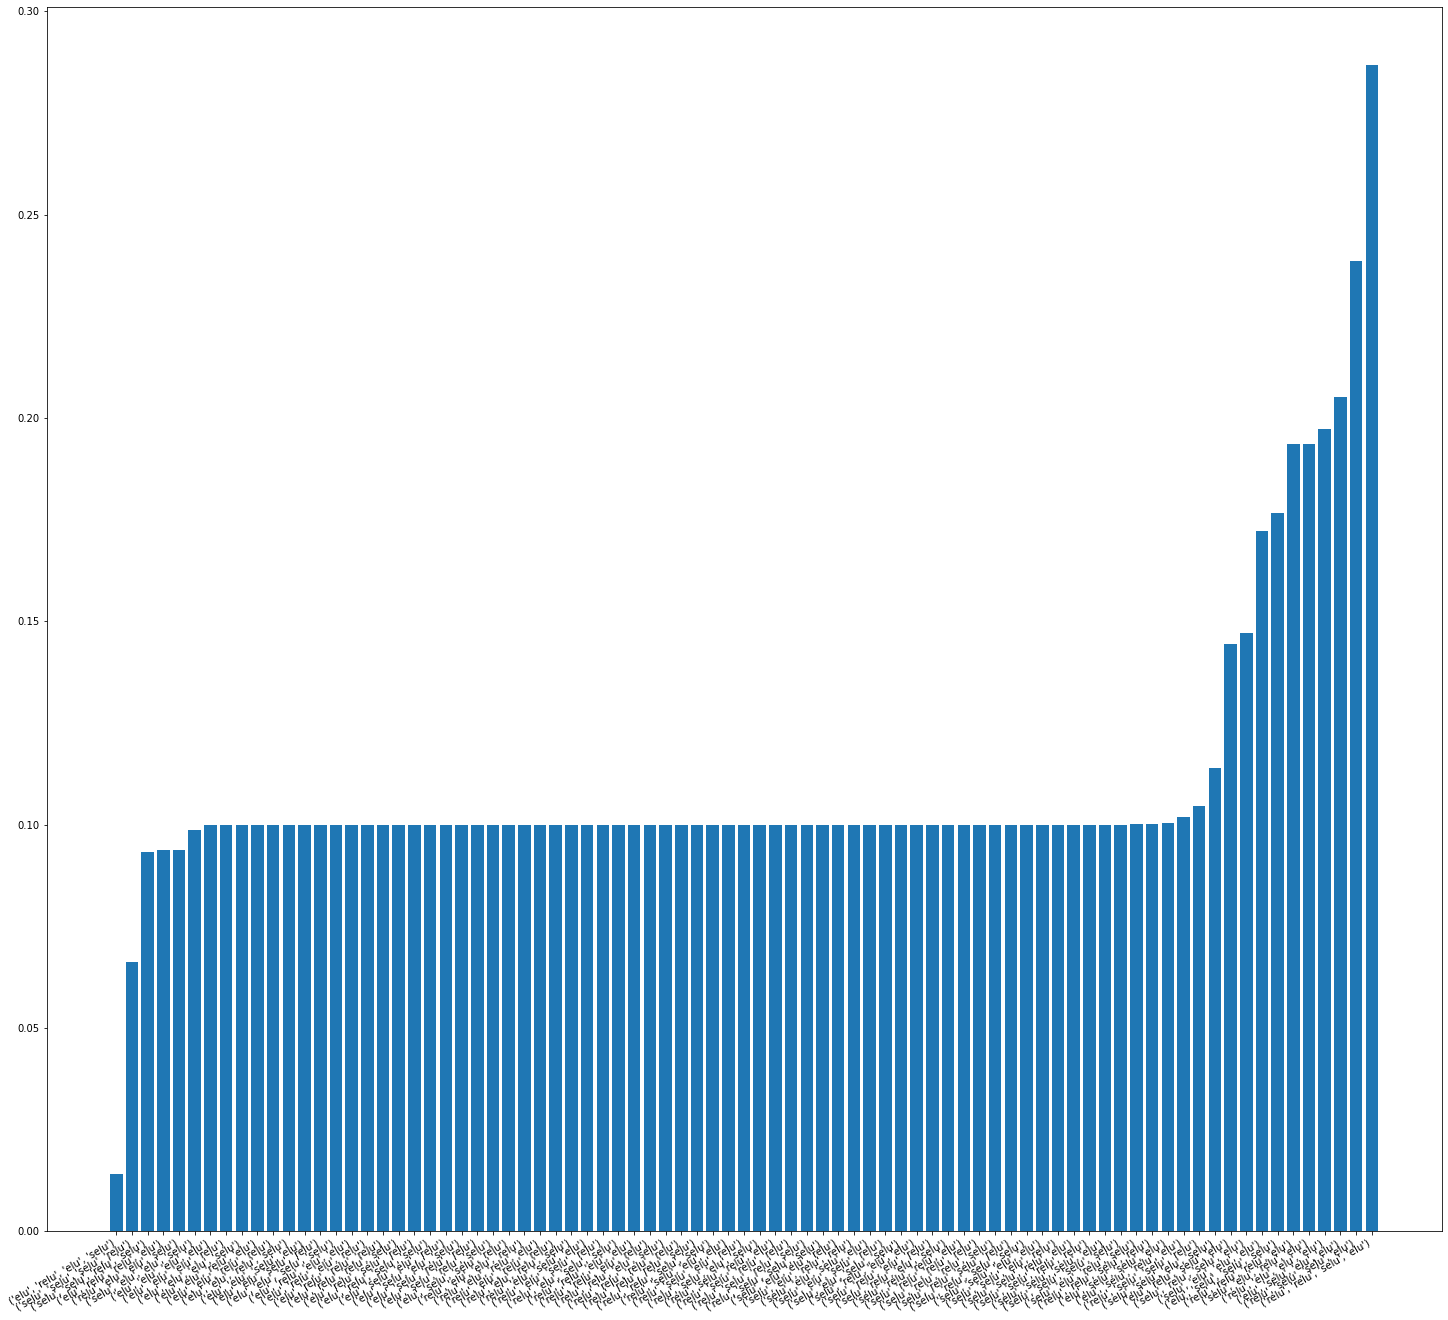

In [65]:
plotvar2 = sorted(actdict_4layer.items(),key=lambda x: (x[1],x[0]))
plt.bar([str(x[0]) for x in plotvar2],[x[1] for x in plotvar2])
f = plt.gcf()
f.set_size_inches(25,25)
f.autofmt_xdate()

# Number of Units Training

In [77]:
HP_FILTER1 = hp.HParam('filters1', hp.Discrete([32, 64, 128]))
HP_FILTER2 = hp.HParam('filters2', hp.Discrete([32, 64, 128]))
# HP_KERNEL1 = hp.HParam('kernel1',hp.Discrete([3,4,5]))
# HP_KERNEL2 = hp.HParam('kernel2',hp.Discrete([3,4,5]))
HP_NUM_UNITS1 = hp.HParam('num_units1', hp.Discrete([256, 512, 1024]))
# HP_NUM_UNITS2 = hp.HParam('num_units2', hp.Discrete([256, 512, 1024]))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning_units').as_default():
  hp.hparams_config(
    hparams=[HP_FILTER1,HP_FILTER2,HP_NUM_UNITS1],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

In [ ]:
def train_test_model(hparams):
  #model = load_model('/content/drive/My Drive/Colab Notebooks/CS581-TestResults/AutoKerasFashionMNIST.h5')
    model = models.Sequential()
    model.add(keras.layers.Reshape(input_shape=(28*28,), target_shape=(28, 28, 1))),
    model.add(layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28)))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.50))
    model.add(layers.Dense(10))

    model.compile(
        optimizer=hparams[HP_OPTIMIZER],
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'],
    )
    model.fit(x_train, y_train, epochs=15) # Run with 1 epoch to speed things up for demo purposes
    _, accuracy = model.evaluate(x_test, y_test)
    return accuracy

In [78]:
def train_test_model(hparams):
  #model = load_model('/content/drive/My Drive/Colab Notebooks/CS581-TestResults/AutoKerasFashionMNIST.h5')
    model = models.Sequential()
    model.add(keras.layers.Reshape(input_shape=(28*28,), target_shape=(28, 28, 1))),
    model.add(layers.Conv2D(hparams[HP_FILTER1], kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28)))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    model.add(layers.Conv2D(hparams[HP_FILTER2], kernel_size=(3,3), padding='same', activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(hparams[HP_NUM_UNITS1], activation='relu'))
    
    model.add(layers.Dropout(0.50))
    model.add(layers.Dense(10))

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'],
    )
    model.fit(x_train, y_train, epochs=15) # Run with 1 epoch to speed things up for demo purposes
    _, accuracy = model.evaluate(x_test, y_test)
    return accuracy

In [79]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)
  return accuracy

In [82]:
session_num = 0
unitdict = {}
for unit1 in HP_FILTER1.domain.values:
    for unit2 in HP_FILTER2.domain.values:
        for unit3 in HP_NUM_UNITS1.domain.values:
                    hparams = {
                        HP_FILTER1: unit1,
                        HP_FILTER2: unit2,
                        HP_NUM_UNITS1: unit3,
                    }
                    run_name = "run-%d" % session_num
                    print('--- Starting trial: %s' % run_name)
                    print({h.name: hparams[h] for h in hparams})
                    unitdict[(unit1,unit2,unit3)] = run('logs/hparam_tuning_acts/' + run_name, hparams)
                    session_num += 1


--- Starting trial: run-0
{'filters1': 32, 'filters2': 32, 'num_units1': 256}
Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3691 - accuracy: 0.1159
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3033 - accuracy: 0.1093
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3031 - accuracy: 0.1000
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3050 - accuracy: 0.1009
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.1023
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3026 - accuracy: 0.1011
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3034 - accuracy: 0.1050
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3026 - accuracy: 0.1091
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.1080
Epoc

In [83]:
print(f'Number of Sessions: {session_num}')

Number of Sessions: 27


In [84]:
unitdict

{(32, 32, 256): 0.13410000503063202,
 (32, 32, 512): 0.10010000318288803,
 (32, 32, 1024): 0.10000000149011612,
 (32, 64, 256): 0.10000000149011612,
 (32, 64, 512): 0.20329999923706055,
 (32, 64, 1024): 0.10000000149011612,
 (32, 128, 256): 0.10000000149011612,
 (32, 128, 512): 0.10000000149011612,
 (32, 128, 1024): 0.08380000293254852,
 (64, 32, 256): 0.10000000149011612,
 (64, 32, 512): 0.10000000149011612,
 (64, 32, 1024): 0.10000000149011612,
 (64, 64, 256): 0.10000000149011612,
 (64, 64, 512): 0.10000000149011612,
 (64, 64, 1024): 0.10000000149011612,
 (64, 128, 256): 0.10000000149011612,
 (64, 128, 512): 0.10000000149011612,
 (64, 128, 1024): 0.10000000149011612,
 (128, 32, 256): 0.10000000149011612,
 (128, 32, 512): 0.10000000149011612,
 (128, 32, 1024): 0.28700000047683716,
 (128, 64, 256): 0.10000000149011612,
 (128, 64, 512): 0.1500999927520752,
 (128, 64, 1024): 0.10010000318288803,
 (128, 128, 256): 0.10000000149011612,
 (128, 128, 512): 0.10000000149011612,
 (128, 128, 102

In [85]:
print(sorted(unitdict.items(),key=lambda x: (x[1],x[0])))

[((32, 128, 1024), 0.08380000293254852), ((32, 32, 1024), 0.10000000149011612), ((32, 64, 256), 0.10000000149011612), ((32, 64, 1024), 0.10000000149011612), ((32, 128, 256), 0.10000000149011612), ((32, 128, 512), 0.10000000149011612), ((64, 32, 256), 0.10000000149011612), ((64, 32, 512), 0.10000000149011612), ((64, 32, 1024), 0.10000000149011612), ((64, 64, 256), 0.10000000149011612), ((64, 64, 512), 0.10000000149011612), ((64, 64, 1024), 0.10000000149011612), ((64, 128, 256), 0.10000000149011612), ((64, 128, 512), 0.10000000149011612), ((64, 128, 1024), 0.10000000149011612), ((128, 32, 256), 0.10000000149011612), ((128, 32, 512), 0.10000000149011612), ((128, 64, 256), 0.10000000149011612), ((128, 128, 256), 0.10000000149011612), ((128, 128, 512), 0.10000000149011612), ((128, 128, 1024), 0.10000000149011612), ((32, 32, 512), 0.10010000318288803), ((128, 64, 1024), 0.10010000318288803), ((32, 32, 256), 0.13410000503063202), ((128, 64, 512), 0.1500999927520752), ((32, 64, 512), 0.2032999

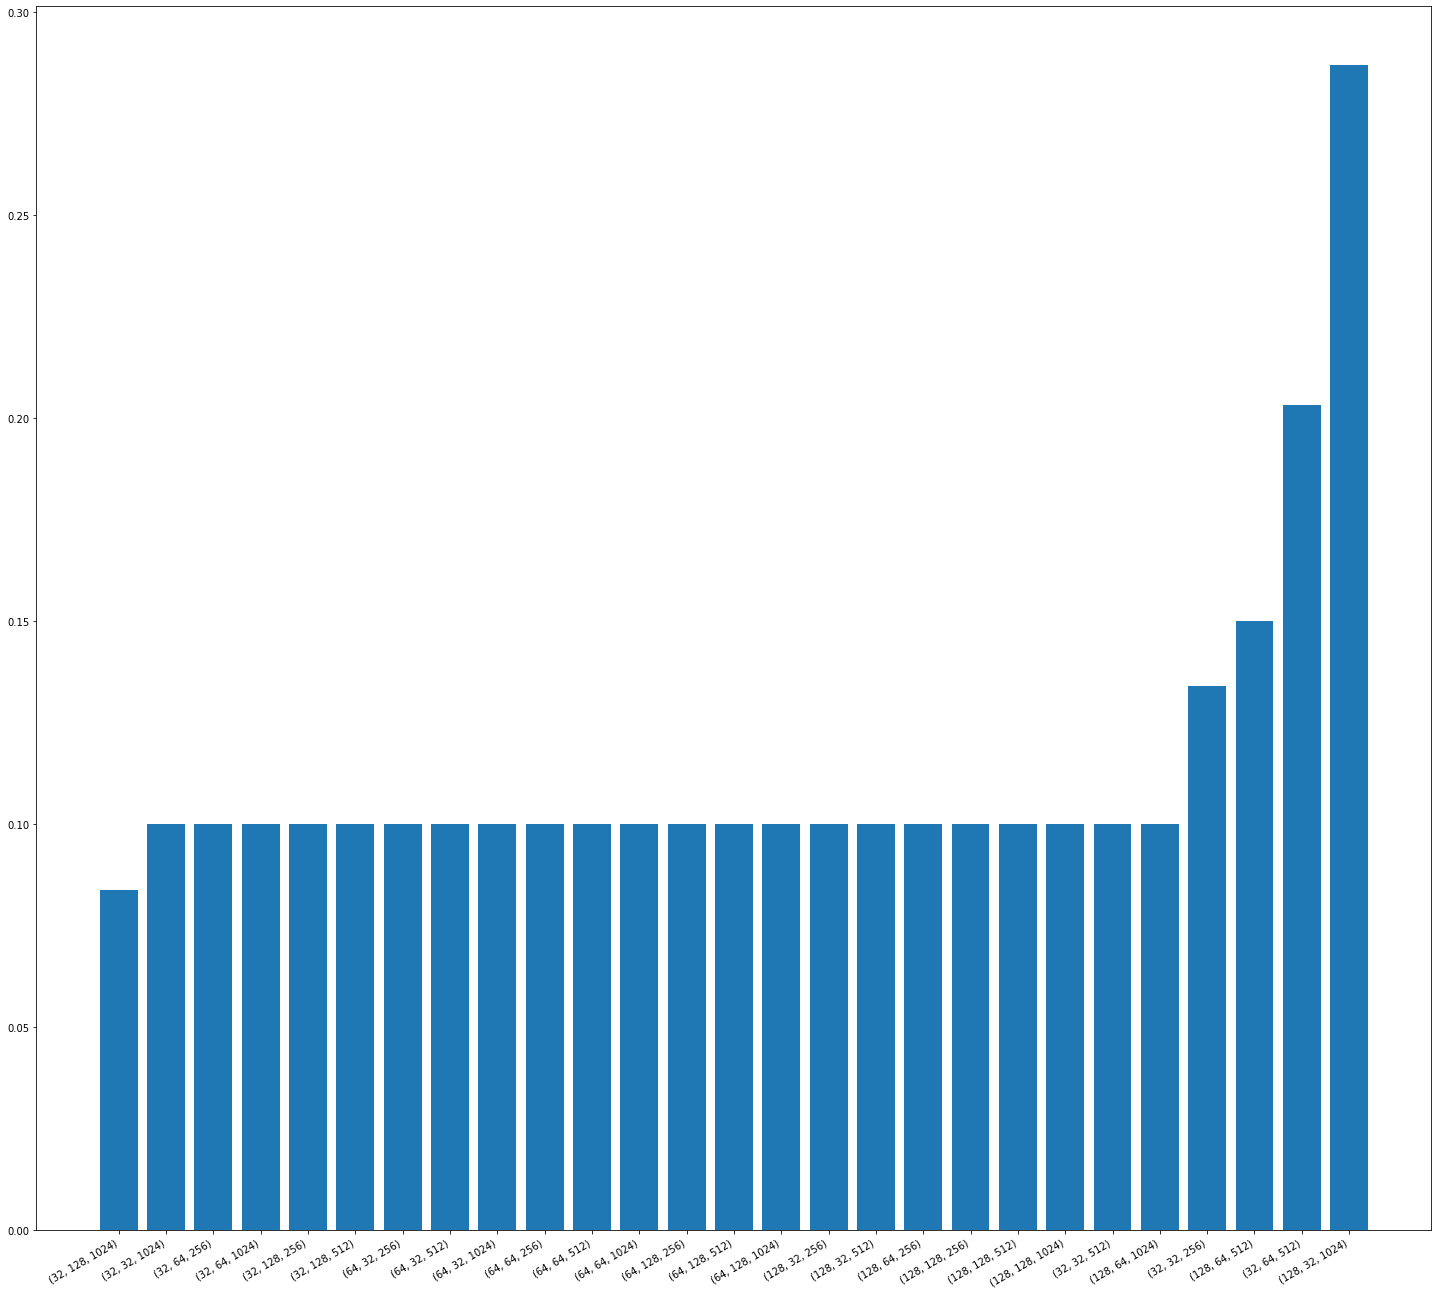

In [86]:
plotvar3 = sorted(unitdict.items(),key=lambda x: (x[1],x[0]))
plt.bar([str(x[0]) for x in plotvar3],[x[1] for x in plotvar3])
f = plt.gcf()
f.set_size_inches(25,25)
f.autofmt_xdate()

# END